## Final Project Submission

Please fill out:
* Student name: Mary Njeri Kamithi
* Student pace: self paced / part time / full time : Full Time Remote (DSFT13)
* Scheduled project review date/time: 29/6/2025
* Instructor name: William Okomba
* Blog post URL:







#Introduction



In [ ]:
'''
Welcome to my aviation accident analysis project!

In this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help a company decide which types of aircraft might be the safest investment as they enter the aviation industry.
The dataset includes accidents from 1962 to 2023, with information about flight phases, aircraft damage, fatalities, and more.

My goal was to clean and explore the data to find patterns in aviation accidents and identify which aircraft characteristics are linked to higher or lower risk.
I created visualizations and summarized the most important findings to support business decisions and reduce potential risks when purchasing aircraft.


'''

'\nWelcome to my aviation accident analysis project!\n\nIn this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help a company decide which types of aircraft might be the safest investment as they enter the aviation industry.\nThe dataset includes accidents from 1962 to 2023, with information about flight phases, aircraft damage, fatalities, and more.\n\nMy goal was to clean and explore the data to find patterns in aviation accidents and identify which aircraft characteristics are linked to higher or lower risk.\nI created visualizations and summarized the most important findings to support business decisions and reduce potential risks when purchasing aircraft.\n\n\n'

#Data Preparation

In [ ]:
#All neccessary imports
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1')
state_codes = pd.read_csv('USState_Codes.csv')


c:\Users\maryk\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.shape

(88889, 31)

In [ ]:
df.info(verbose=True, show_counts=True)

TypeError: info() got an unexpected keyword argument 'show_counts'

In [ ]:
for column in df:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')

Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident.Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event.Date','
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

Unique values in column 'Country','
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' '

In [ ]:
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,51
Country,226
Latitude,51863
Longitude,51873
Airport.Code,28593
Airport.Name,26176


In [ ]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Handling null values

In [ ]:
#handling the columns with too many null values
high_null_cols = ['Latitude','Longitude','Aircraft.Category','FAR.Description','Schedule','Air.carrier']
df.drop(columns = high_null_cols, inplace =True)

In [ ]:
#Filling numeric cols with 0
num_cols = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']
df[num_cols] = df[num_cols].fillna(0)

In [ ]:
#Filling categorical cols with 'Unknown'
cat_cols =[ 'Location', 'Country', 'Airport.Code', 'Airport.Name','Injury.Severity', 'Aircraft.damage', 'Registration.Number','Make', 'Model', 'Amateur.Built', 'Engine.Type','Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight','Report.Status']
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [ ]:
#Converting dates and handling null vals
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors = 'coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors = 'coerce')



/tmp/ipython-input-13-3081802418.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors = 'coerce')


In [ ]:
#Rechecking missing vals
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,0
Country,0
Airport.Code,0
Airport.Name,0
Injury.Severity,0
Aircraft.damage,0


In [ ]:
#Handling the remaining columns that have null values
# Fill with median
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

#Handling publication date
df.drop(columns=['Publication.Date'], inplace=True)


In [ ]:
df.isnull().sum().sum()

np.int64(0)

# **EXPLORATORY DATA ANALYSIS (EDA)**

Univariate Analysis

In [ ]:
#Numerical cols
numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
df[numerical_cols].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
count,62663.000000,62663.000000,62663.000000,62663.000000,62663.000000
mean,0.555384,0.216172,0.355473,4.533281,1.145317
std,5.076136,1.101469,2.430670,25.427332,0.447148
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,349.000000,106.000000,380.000000,699.000000,4.000000


In [ ]:
# Convert to numeric in case there are non-numeric entries
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Display summary statistics
summary = df[numerical_cols].describe().T[['min', 'max', 'mean', '50%', 'std']]
summary.rename(columns={'50%': 'median'}, inplace=True)
print(summary)

                        min    max      mean  median        std
Total.Fatal.Injuries    0.0  349.0  0.555384     0.0   5.076136
Total.Serious.Injuries  0.0  106.0  0.216172     0.0   1.101469
Total.Minor.Injuries    0.0  380.0  0.355473     0.0   2.430670
Total.Uninjured         0.0  699.0  4.533281     1.0  25.427332
Number.of.Engines       0.0    4.0  1.145317     1.0   0.447148


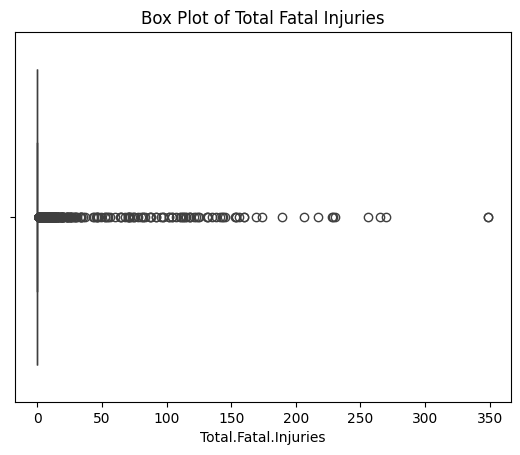

In [ ]:
#boxplot for outliers in total fatal injuries
sns.boxplot(x=df['Total.Fatal.Injuries'])
plt.title('Box Plot of Total Fatal Injuries')
plt.show()

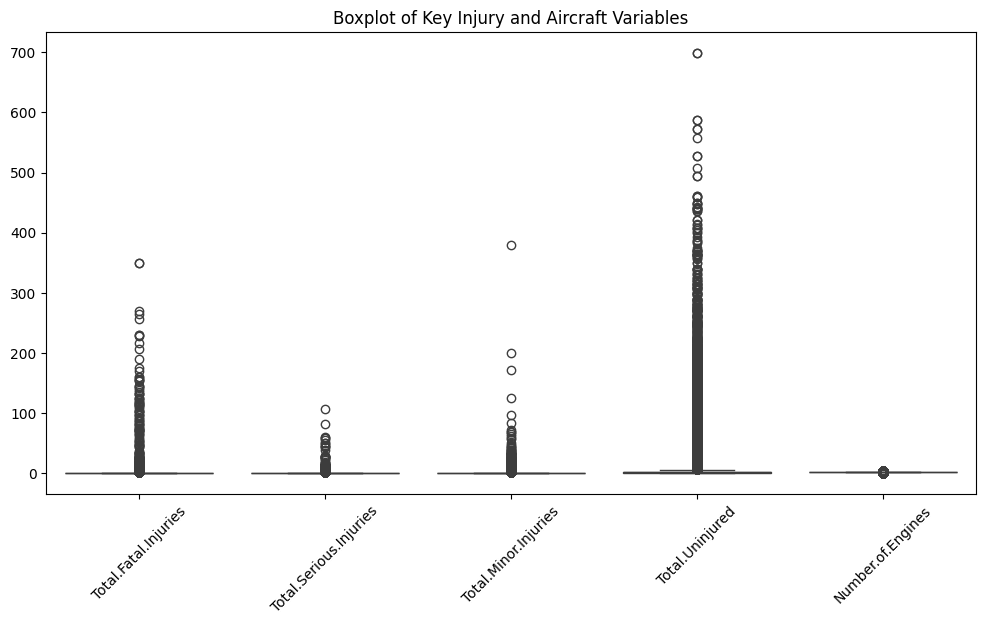

In [ ]:
#boxplot of key injury and aircraft variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                     'Total.Minor.Injuries', 'Total.Uninjured',
                     'Number.of.Engines']])
plt.xticks(rotation=45)
plt.title('Boxplot of Key Injury and Aircraft Variables')
plt.show()

In [ ]:
#Handling skewed data
df['Total.Serious.Injuries'] = pd.to_numeric(df['Total.Serious.Injuries'], errors='coerce')
df['Total.Serious.Injuries'].fillna(0, inplace=True)

/tmp/ipython-input-21-3799509882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Serious.Injuries'].fillna(0, inplace=True)


In [ ]:
#zero counts and skewness
for col in numerical_cols:
    zero_count = (df[col] == 0).sum()
    skew = df[col].skew()
    print(f"{col}: Zeros = {zero_count}, Skewness = {skew:.2f}")

Total.Fatal.Injuries: Zeros = 50325, Skewness = 36.37
Total.Serious.Injuries: Zeros = 53909, Skewness = 40.66
Total.Minor.Injuries: Zeros = 50783, Skewness = 83.11
Total.Uninjured: Zeros = 24431, Skewness = 10.57
Number.of.Engines: Zeros = 901, Skewness = 2.56


Bivariate Aanalysis

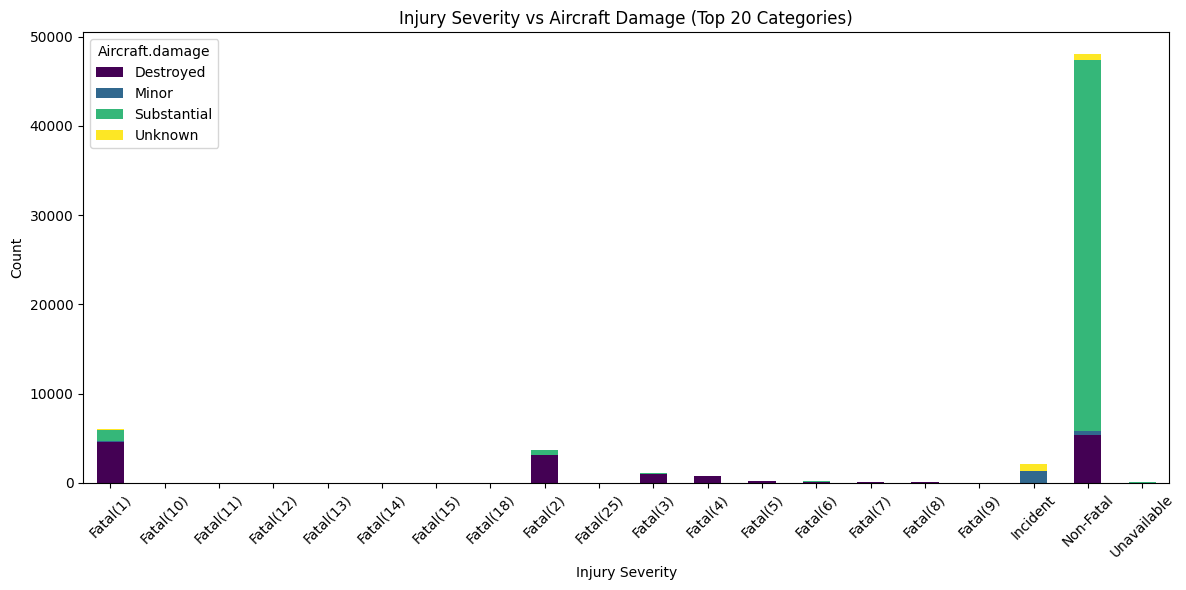

In [ ]:
#categorical vs categorical
#function to limit to top 20 categories
def limit_top_20(df, col):
    top_values = df[col].value_counts().nlargest(20).index
    return df[df[col].isin(top_values)]

# Limit both variables to top 20 categories for readability
df_cat = limit_top_20(df, 'Injury.Severity')
df_cat = limit_top_20(df_cat, 'Aircraft.damage')

# Crosstab
ct = pd.crosstab(df_cat['Injury.Severity'], df_cat['Aircraft.damage'])

# Plot
ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Injury Severity vs Aircraft Damage (Top 20 Categories)")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



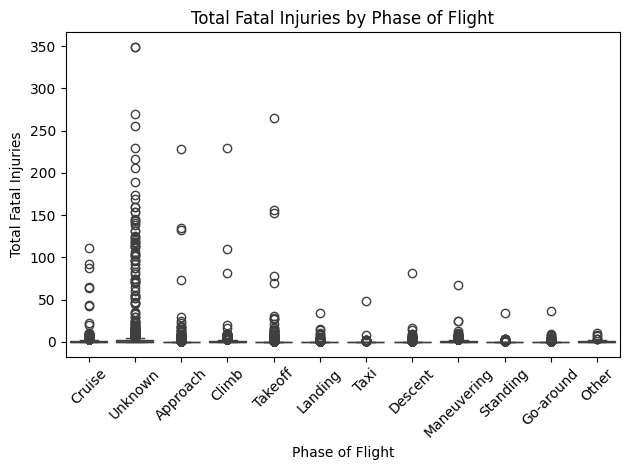

In [ ]:
#categorical vs numerical
sns.boxplot(x='Broad.phase.of.flight', y='Total.Fatal.Injuries', data=df)
plt.title("Total Fatal Injuries by Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Total Fatal Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


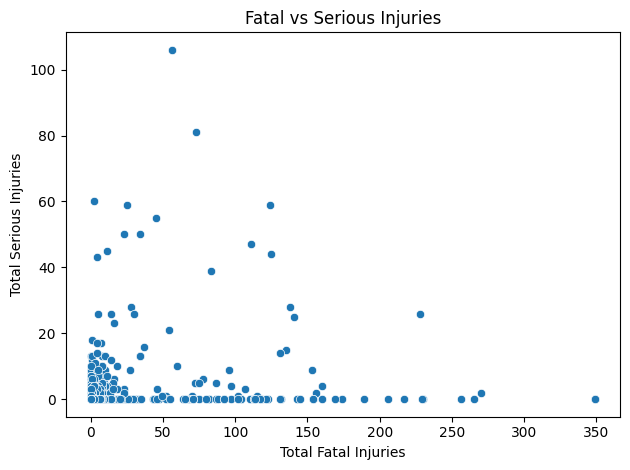

In [ ]:
#umerical vs numerical
# Scatter plot between Serious and Fatal Injuries
sns.scatterplot(x='Total.Fatal.Injuries', y='Total.Serious.Injuries', data=df)
plt.title("Fatal vs Serious Injuries")
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Total Serious Injuries")
plt.tight_layout()
plt.show()

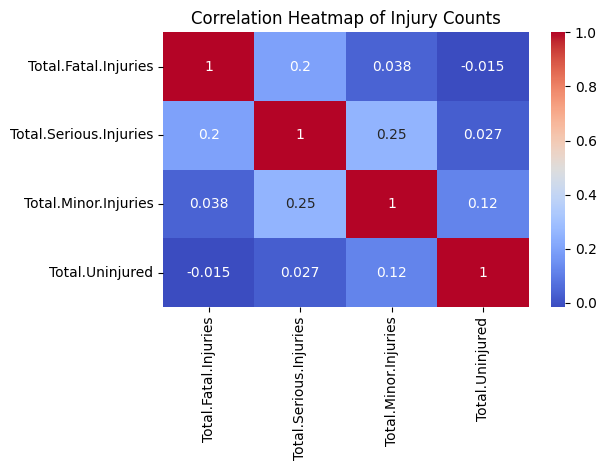

In [ ]:
#correlation heatmap of injury columns
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
corr = df[injury_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Injury Counts")
plt.tight_layout()
plt.show()

Mulltivariate Analysis


In [ ]:
# Count the top 10 most common aircraft makes
top_10_makes = df['Make'].value_counts().nlargest(10).index

# Create a new column that groups lesser makes as 'Other'
df['Make_Grouped'] = df['Make'].apply(lambda x: x if x in top_10_makes else 'Other')

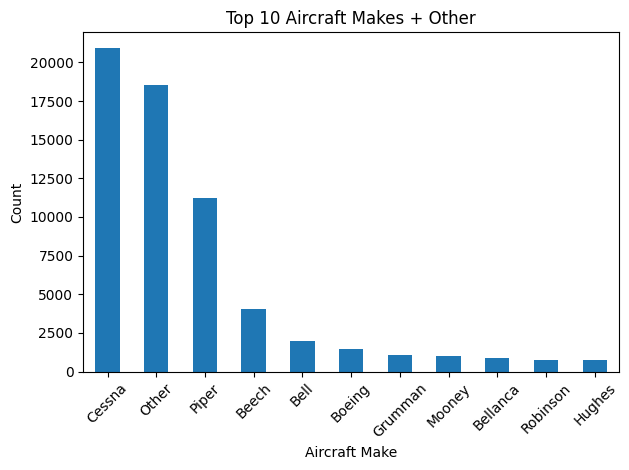

In [ ]:
df['Make_Grouped'].value_counts().plot(kind='bar', title='Top 10 Aircraft Makes + Other')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

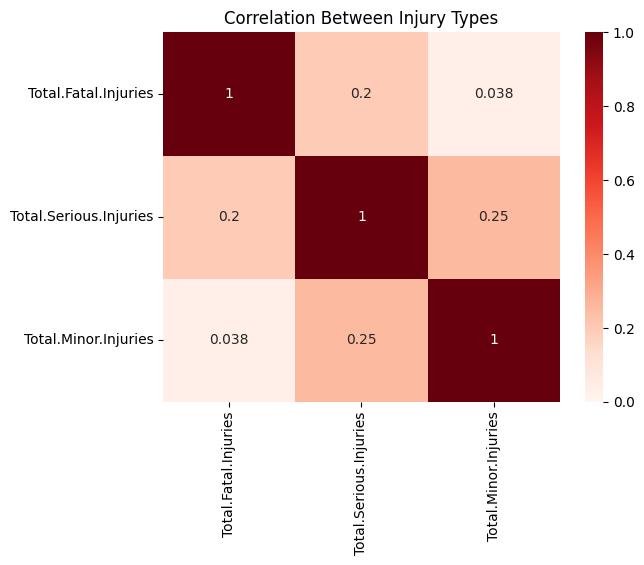

In [ ]:


injury_vars = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Convert to numeric in case of issues
df[injury_vars] = df[injury_vars].apply(pd.to_numeric, errors='coerce')

# Correlation matrix and heatmap
corr = df[injury_vars].corr()
sns.heatmap(corr, annot=True, cmap='Reds', vmin=0, vmax=1)
plt.title('Correlation Between Injury Types')
plt.show()

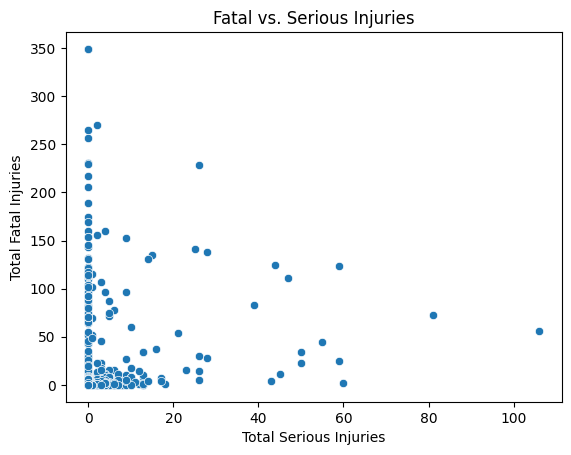

In [ ]:
sns.scatterplot(data=df, x='Total.Serious.Injuries', y='Total.Fatal.Injuries')
plt.title('Fatal vs. Serious Injuries')
plt.xlabel('Total Serious Injuries')
plt.ylabel('Total Fatal Injuries')
plt.show()

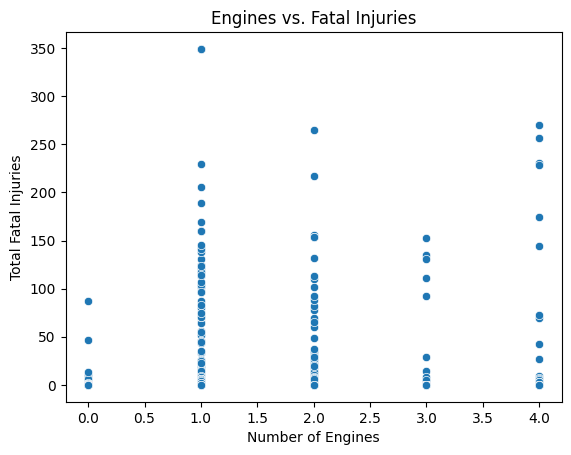

In [ ]:
sns.scatterplot(data=df, x='Number.of.Engines', y='Total.Fatal.Injuries')
plt.title('Engines vs. Fatal Injuries')
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.show()

In [ ]:
# Create a binary column 'Is_Fatal'
df['Is_Fatal'] = df['Total.Fatal.Injuries'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

# Optional: preview value counts to confirm
print(df['Is_Fatal'].value_counts())


Is_Fatal
0    50325
1    12338
Name: count, dtype: int64


In [ ]:
df.groupby('Is_Fatal')[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].mean()


,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Is_Fatal,,,
0,0.193661,0.397854,5.517357
1,0.307992,0.182607,0.519371


/tmp/ipython-input-34-3897349406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Is_Fatal', palette='Set2')


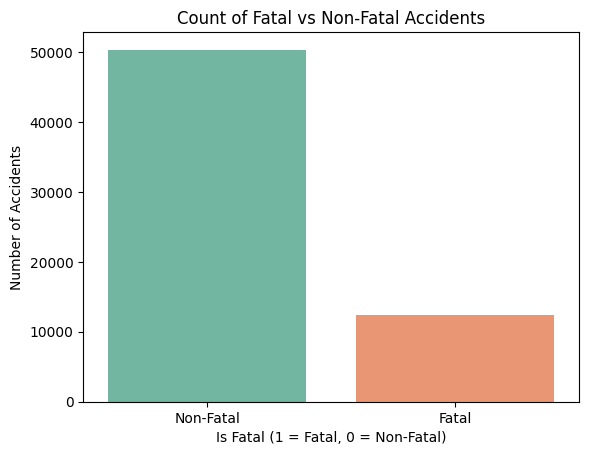

In [ ]:
sns.countplot(data=df, x='Is_Fatal', palette='Set2')
plt.title('Count of Fatal vs Non-Fatal Accidents')
plt.xlabel('Is Fatal (1 = Fatal, 0 = Non-Fatal)')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1], ['Non-Fatal', 'Fatal'])
plt.show()


In [ ]:
df.to_csv("cleaned_aviation_data.csv", index=False)


#Conclusion

In [ ]:
'''
The aviation accident dataset reveals notable trends across time, conditions, and operational contexts.
A significant concentration of reported incidents has occurred since the year 2000, which may reflect enhanced reporting practices rather than an actual rise in accident frequency.
Seasonal variation is apparent, with a slight uptick during the summer months—potentially due to increased flight activity.
While weekday patterns are relatively even, weekends show marginally fewer events.

Most records are categorized as incidents rather than full accidents, with fatal injuries comprising a minority of cases—though still posing serious implications.
Higher injury severity is clearly associated with more extensive aircraft damage, particularly in cases of destruction.
Interestingly, most accidents happened under clear weather, suggesting human or mechanical error played a greater role than environmental factors.
Crucial flight phases, especially takeoff, landing, and en route, are frequently linked to accident severity, with the en route phase associated with more fatalities.

General aviation—especially private and recreational flights—constitutes the majority of events.
Common aircraft makes such as Cessna and Piper appear frequently due to their widespread use.
Technical characteristics also matter: single-engine, reciprocating-engine aircraft feature prominently.
While weather alone may not reliably predict fatalities, its interaction with flight phase and purpose provides important context for risk analysis and safety planning.

'''


'\nThe aviation accident dataset reveals notable trends across time, conditions, and operational contexts.\nA significant concentration of reported incidents has occurred since the year 2000, which may reflect enhanced reporting practices rather than an actual rise in accident frequency.\nSeasonal variation is apparent, with a slight uptick during the summer months—potentially due to increased flight activity.\nWhile weekday patterns are relatively even, weekends show marginally fewer events.\n\nMost records are categorized as incidents rather than full accidents, with fatal injuries comprising a minority of cases—though still posing serious implications.\nHigher injury severity is clearly associated with more extensive aircraft damage, particularly in cases of destruction.\nInterestingly, most accidents happened under clear weather, suggesting human or mechanical error played a greater role than environmental factors.\nCrucial flight phases, especially takeoff, landing, and en route, 